#### CUSTOMER SEGMENTATION AND DEPOSIT DETECTION SYSTEM CASE STUDY
#### Exploratory Data Analysis - Case study by Temire Tejiri Stephany

In [1]:
# Data analysis
import pandas as pd 
import numpy as np

# Data visualization
import matplotlib.pyplot as plt    
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression   

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evualation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\temir\Downloads\bank - bank.csv")

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Descriptive numerical statistics of the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Descriptive categorical statistics of the dataset
df.describe(include ='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending=False)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

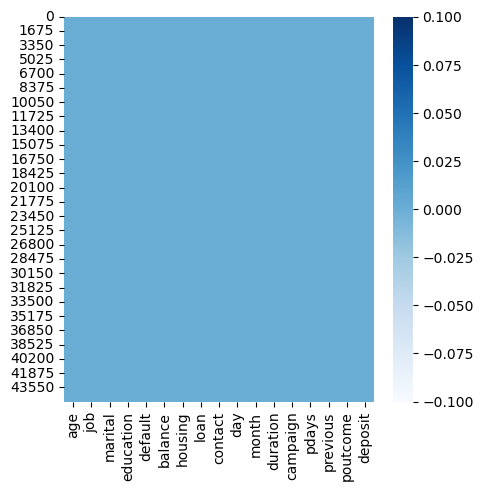

In [9]:
df.isnull().sum()
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=True, cmap="Blues");

### Exploratory Data Analysis
###### Univariate Analysis

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

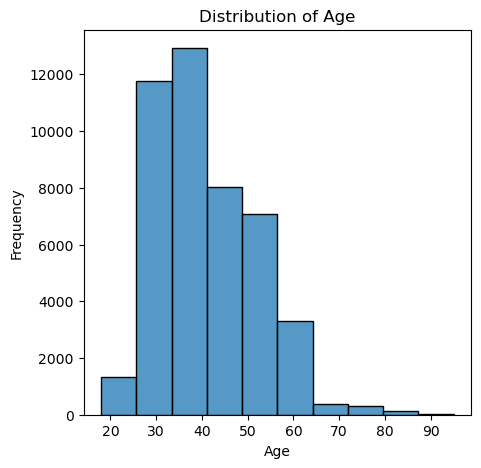

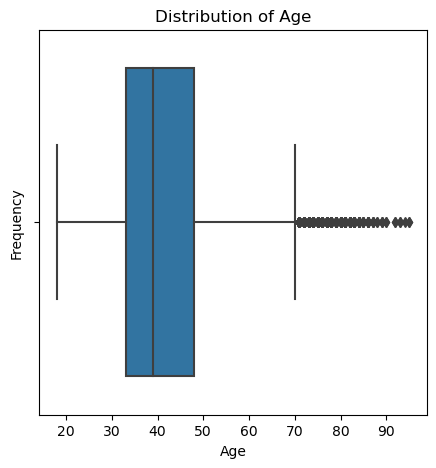

In [11]:
# Histogram distribution of the customers age

plt.figure(figsize=(5,5))
sns.histplot(df['age'],bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot distribution of the age column to ascertain where the outliers are

plt.figure(figsize=(5,5))
sns.boxplot(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

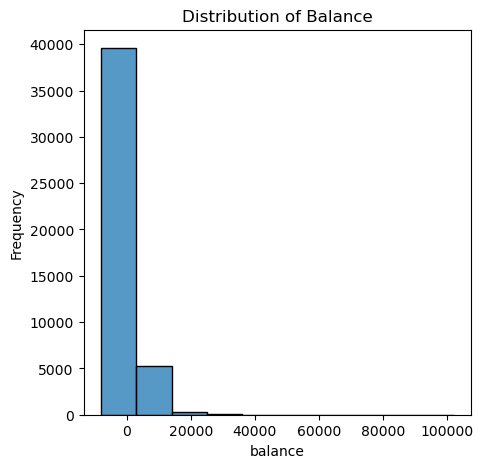

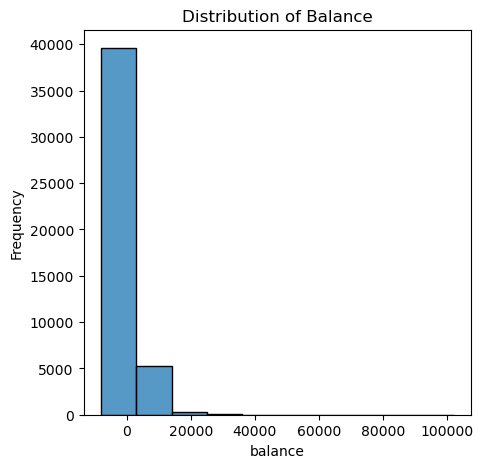

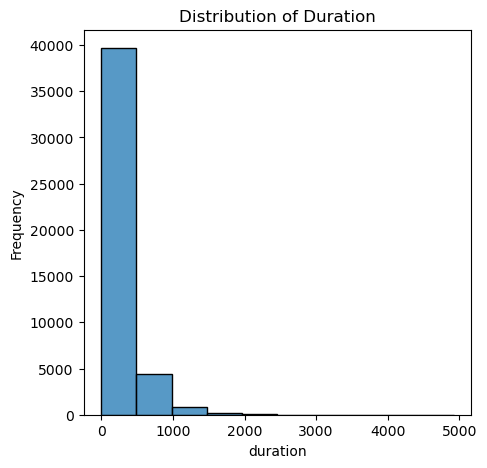

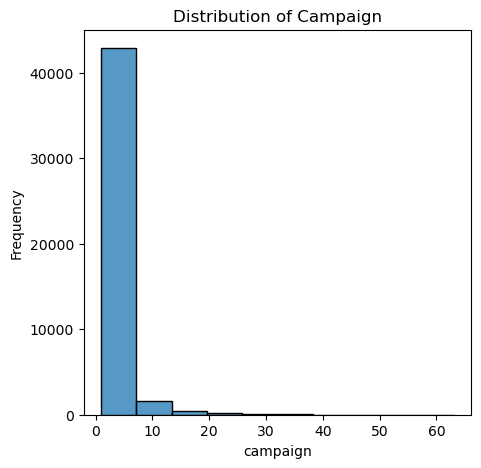

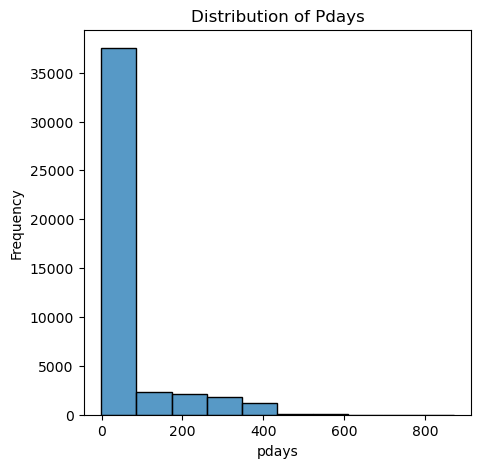

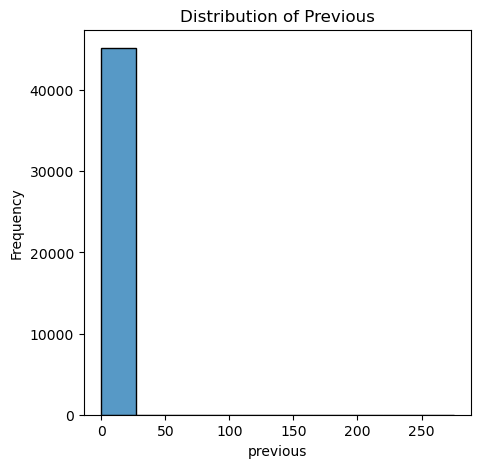

In [12]:
# Histogram distribution of the numerical columns

plt.figure(figsize=(5,5))
sns.histplot(df['balance'],bins=10)
plt.title('Distribution of Balance')
plt.ylabel('Frequency')
plt.show('')

plt.figure(figsize=(5,5))
sns.histplot(df['duration'],bins=10)
plt.title('Distribution of Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(df['campaign'],bins=10)
plt.title('Distribution of Campaign')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(df['pdays'],bins=10)
plt.title('Distribution of Pdays')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(df['previous'],bins=10)
plt.title('Distribution of Previous')
plt.ylabel('Frequency')
plt.show()

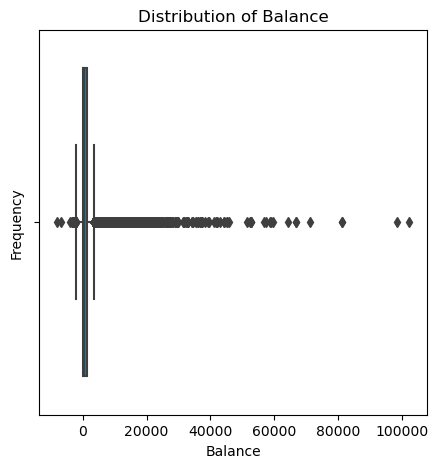

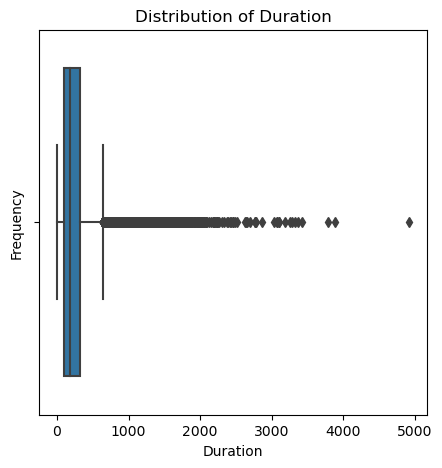

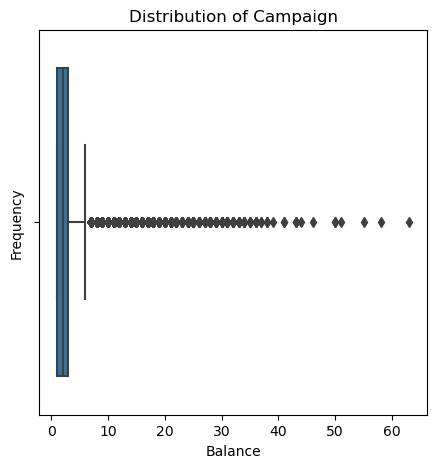

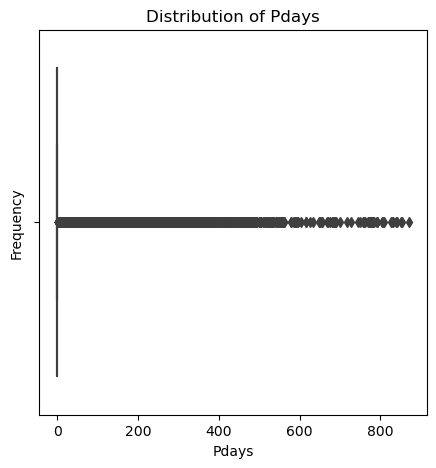

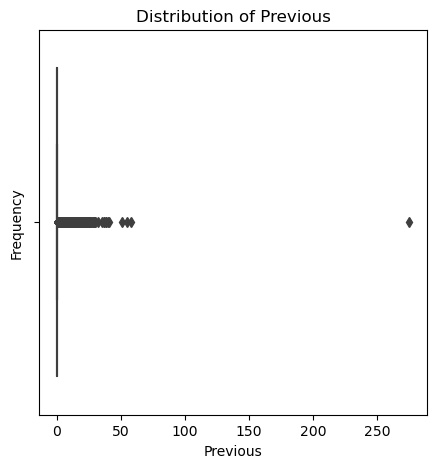

In [13]:
# Boxplot distribution to identify the outliers

plt.figure(figsize=(5,5))
sns.boxplot(df['balance'])
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(df['duration'])
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(df['campaign'])
plt.title('Distribution of Campaign')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(df['pdays'])
plt.title('Distribution of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(df['previous'])
plt.title('Distribution of Previous')
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.show()

- from the dataset we can observe that most of the customers has not defaulted.
- The numbers of customers that has not defaulted on loans or credit card payment are 44396 why 815 customer defaulted.

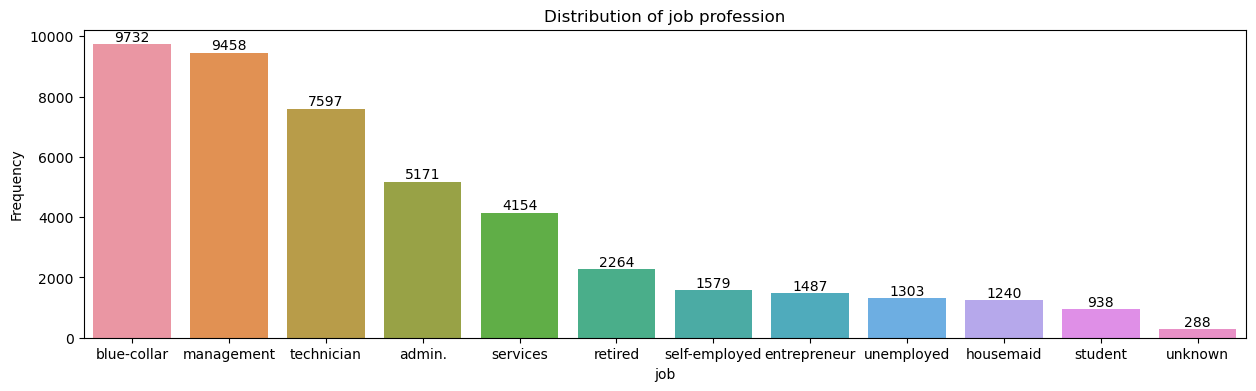

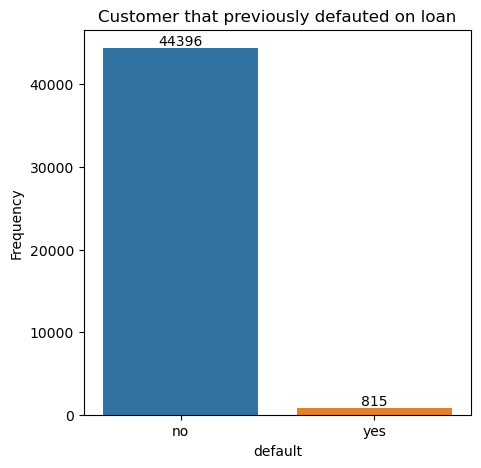

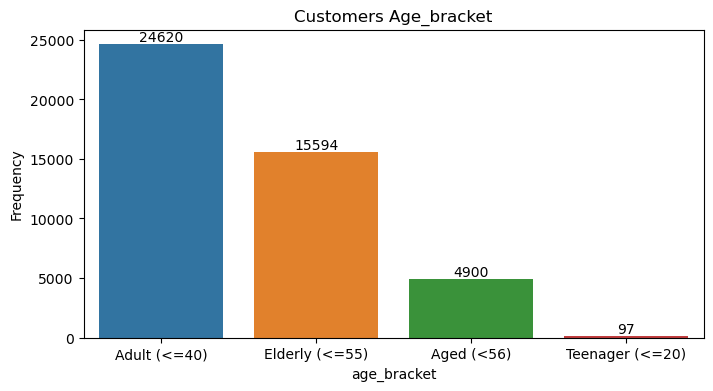

In [14]:
# Countplot

plt.figure(figsize=(15,4))
ax= sns.countplot(x=df["job"], order=df["job"].value_counts(ascending=False).index)
values = df["job"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels= values)
plt.title("Distribution of job profession")
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5,5))
ax= sns.countplot(x=df["default"], order=df["default"].value_counts(ascending =False).index)
values = df["default"].value_counts(ascending =False).values
ax.bar_label(container=ax.containers[0], labels = values)
plt.title("Customer that previously defauted on loan")
plt.ylabel('Frequency')
plt.show()

def age_bracket(age):
    if age <=  20:
        return "Teenager (<=20)"
    elif age <=  40:
        return "Adult (<=40)"
    elif age <=  55:
        return "Elderly (<=55)"
    else:
        return "Aged (<56)"
    
df["age_bracket"] = df["age"].apply(age_bracket)

plt.figure(figsize=(8,4))
ax = sns.countplot(x=df["age_bracket"], order=df["age_bracket"].value_counts(ascending=False).index)
values = df["age_bracket"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Customers Age_bracket")
plt.ylabel('Frequency')
plt.show();

- From the dataset we can observe that most of the customers falls within the Adult < 40 age_bracket and elderly < 55 age category

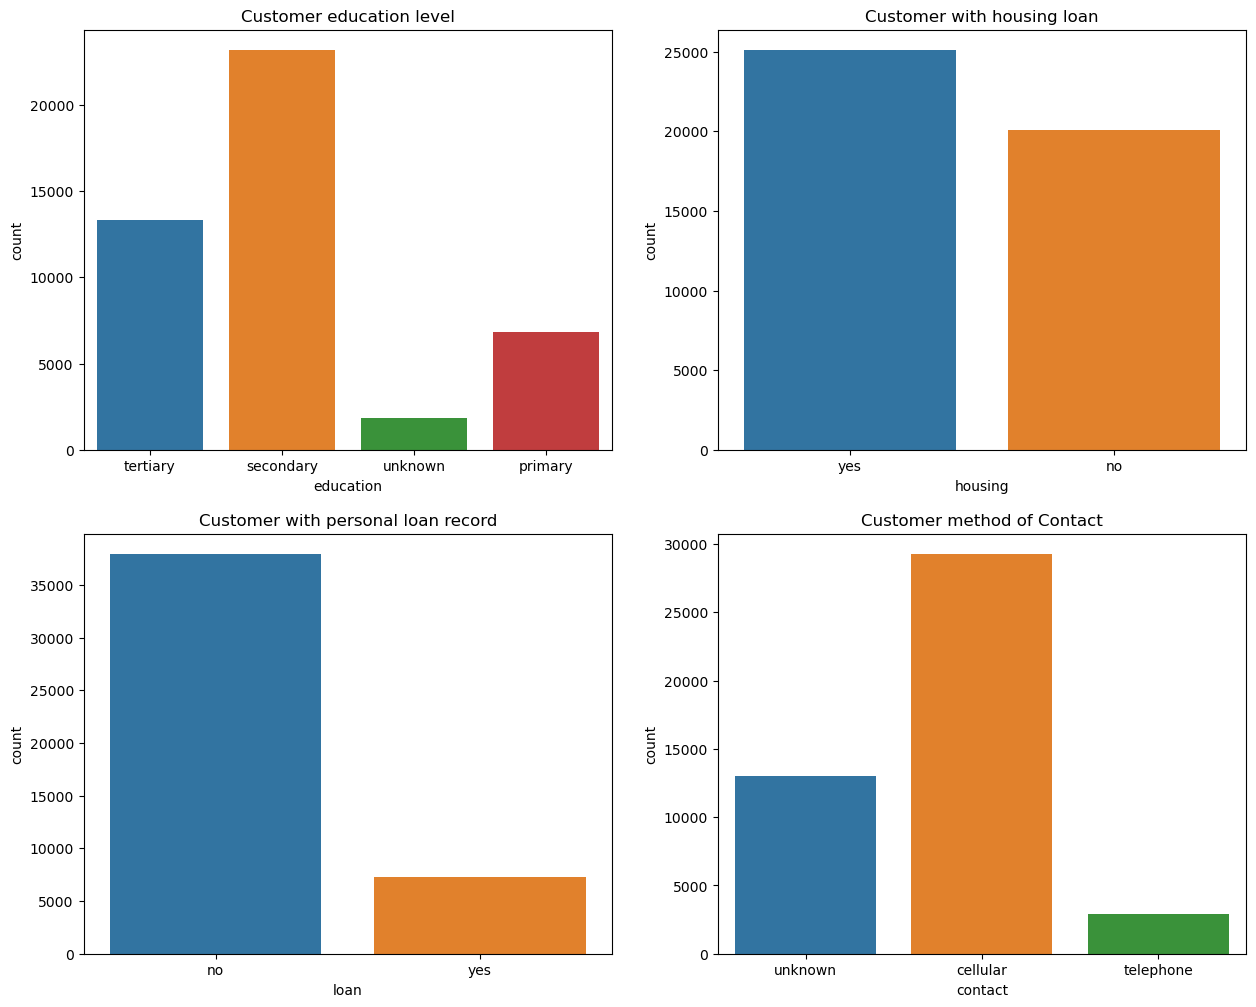

In [15]:
fig, axs = plt.subplots(2,2,figsize=(15,12))

sns.countplot(x=df["education"], data=df, ax=axs[0,0])
axs[0,0].set_title("Customer education level")

sns.countplot(x=df["housing"],data=df, ax=axs[0,1])
axs[0,1].set_title("Customer with housing loan")

sns.countplot(x=df["loan"], data=df, ax=axs[1,0])
axs[1,0].set_title("Customer with personal loan record")

sns.countplot(x=df["contact"],data=df, ax=axs[1,1])
axs[1,1].set_title("Customer method of Contact");

- From the dataset the higest level of education is secondary qualification followed by tertiary education level.
- A large number of customers has a housing loan but very few has taken a personal loan.
- From the data most customer prefer cellular contact than telephone, others didnt specify the method of communication

##### Bivariate Analysis

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Aged (<56)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Elderly (<=55)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult (<=40)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Elderly (<=55)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult (<=40)


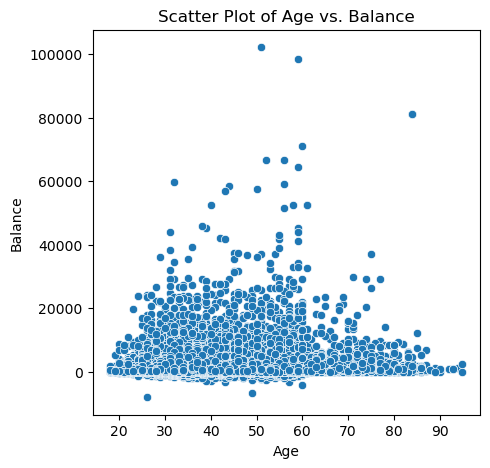

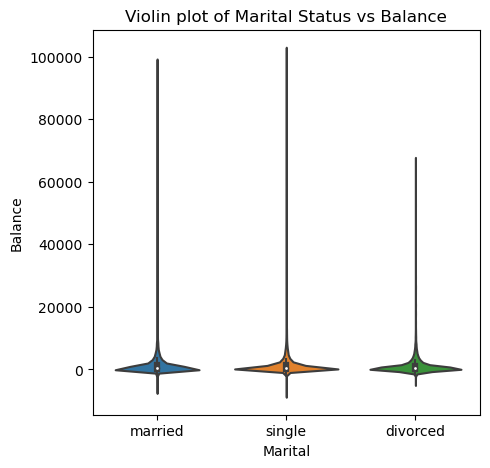

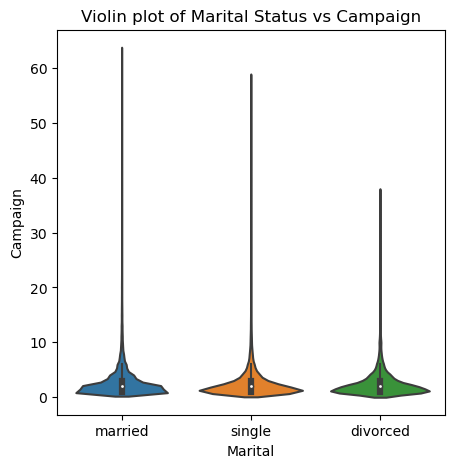

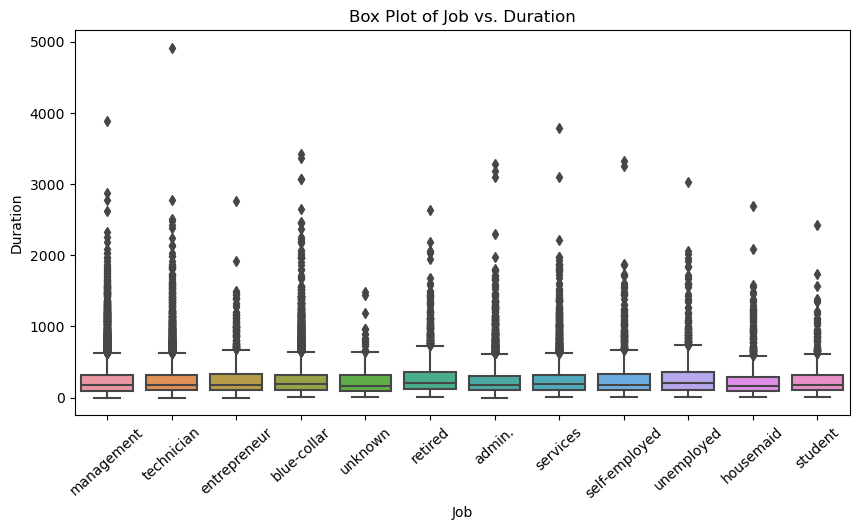

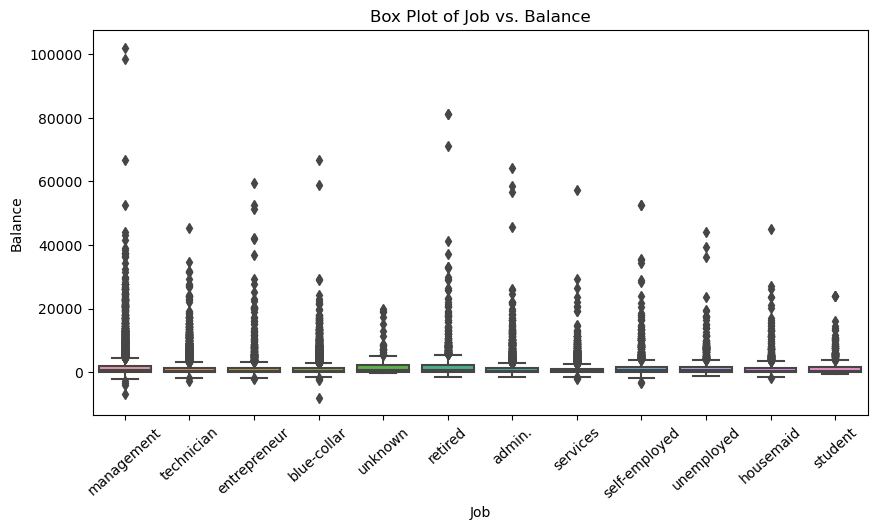

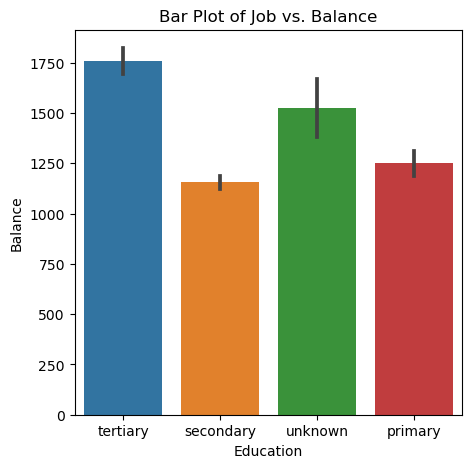

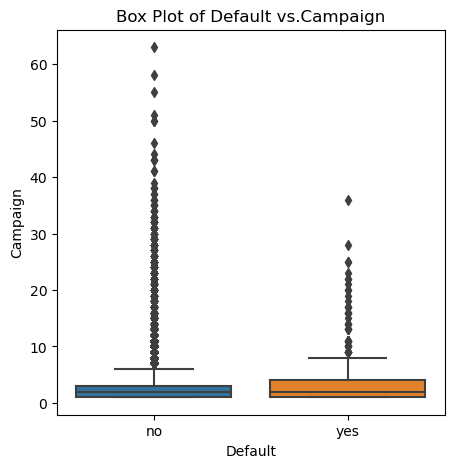

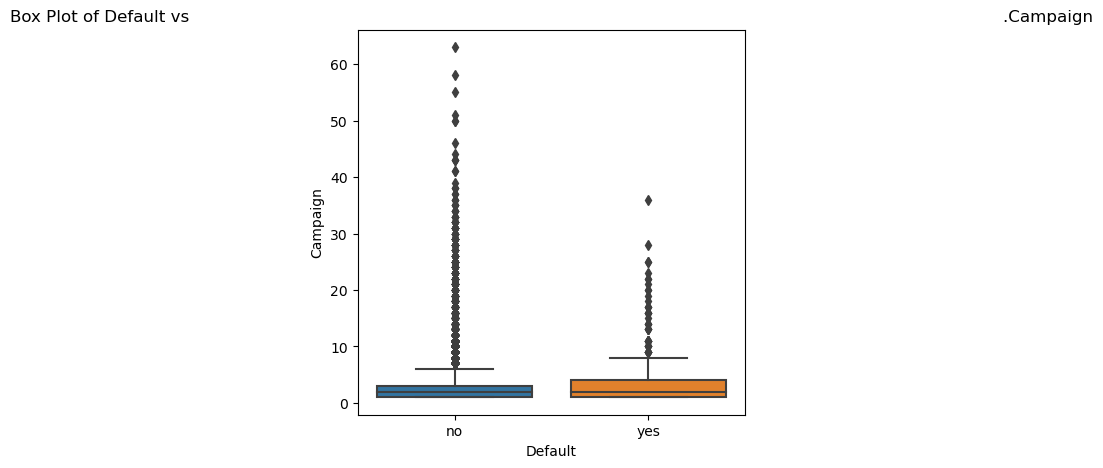

In [17]:
#Scatter plot: Age vs. Balance
plt.figure(figsize=(5,5))
sns.scatterplot(x="age", y="balance", data= df)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

#Violin plott: Marital vs. Balance
plt.figure(figsize=(5,5))
sns.violinplot(x="marital", y="balance", data= df)
plt.title('Violin plot of Marital Status vs Balance')
plt.xlabel('Marital')
plt.ylabel('Balance')
plt.show()

#Violin plot: Marital vs. Campaign
plt.figure(figsize=(5,5))
sns.violinplot(x="marital", y="campaign", data= df)
plt.title('Violin plot of Marital Status vs Campaign')
plt.xlabel('Marital')
plt.ylabel('Campaign')
plt.show()

#Box plot: Job vs. Duration
plt.figure(figsize=(10,5))
sns.boxplot(x="job", y="duration", data= df)
plt.title('Box Plot of Job vs. Duration')
plt.xlabel('Job')
plt.ylabel('Duration')
plt.xticks(rotation=42)
plt.show()

#Box plot: Job vs. Balance
plt.figure(figsize=(10,5))
sns.boxplot(x="job", y="balance", data= df)
plt.title('Box Plot of Job vs. Balance')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=42)
plt.show()

#Bar plot: Education vs. Balance
plt.figure(figsize=(5,5))
sns.barplot(x="education", y="balance", data= df)
plt.title('Bar Plot of Job vs. Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

#Box plot: Default vs.  Campaign 
plt.figure(figsize=(5,5))
sns.boxplot(x="default", y="campaign", data= df)
plt.title('Box Plot of Default vs.Campaign')
plt.xlabel('Default')
plt.ylabel('Campaign')
plt.show()

#3D plot: Balance vs.  Duration 
plt.figure(figsize=(5,5))
sns.boxplot(x="default", y="campaign", data= df)
plt.title('Box Plot of Default vs                                                                                                                                                           .Campaign')
plt.xlabel('Default')
plt.ylabel('Campaign')
plt.show()

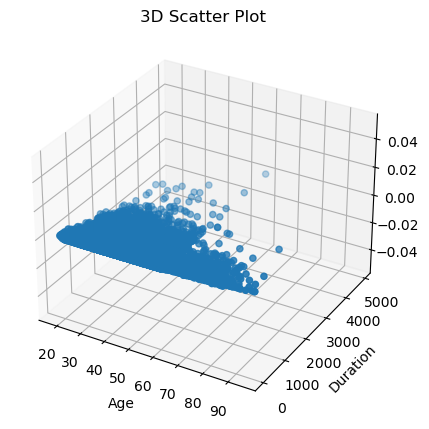

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize =(7,5))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(df['age'], df['duration'])
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
plt.title('3D Scatter Plot')
plt.show()

#### Multivariate Analysis

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bracket'],
      dtype='object')

In [20]:
# Columns for Analysis
columns = ['age','balance','duration','campaign','pdays','previous']

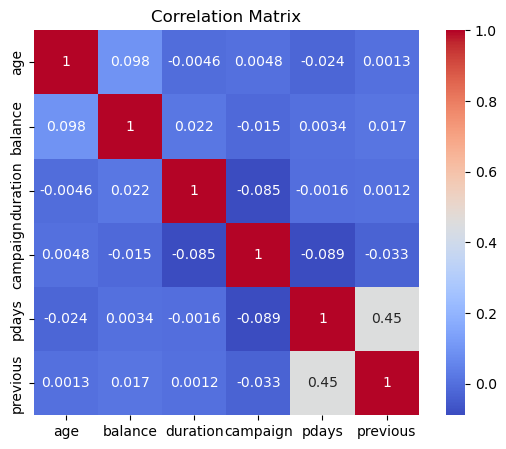

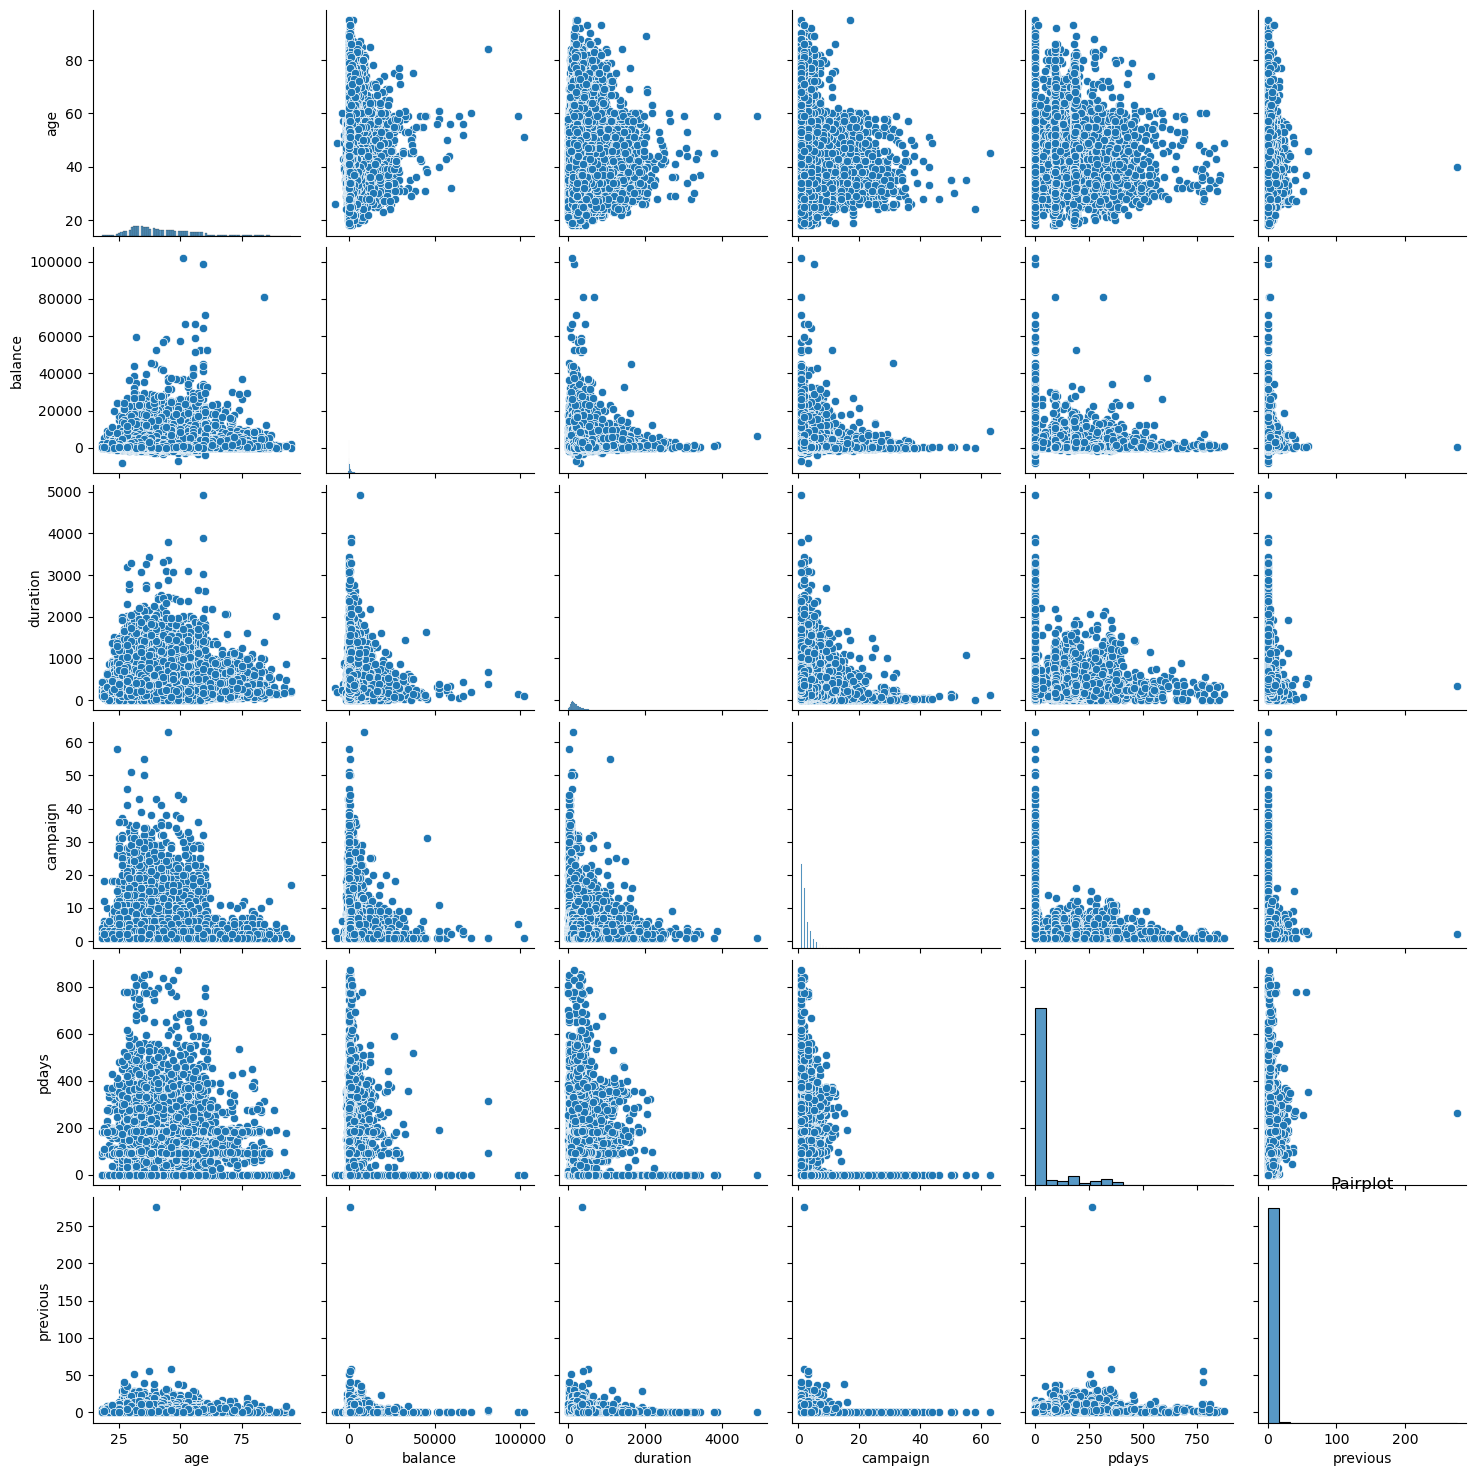

In [21]:
# Create a subset Dataframe with the selected columns
subset_df  = df[columns]

# Compute the correlation matrix
corr = subset_df.corr()

#Visualization of the correlation matrix
plt.figure(figsize =(7,5))
sns.heatmap(corr, cmap='coolwarm', square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(subset_df)
plt.title('Pairplot')
plt.show();

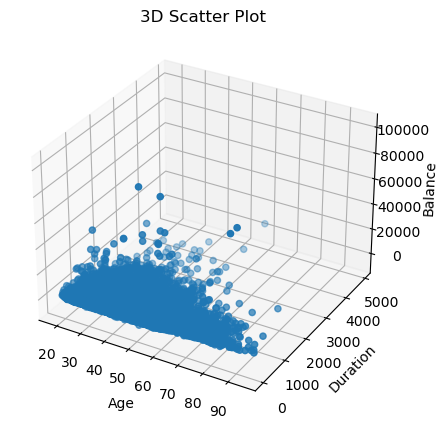

In [22]:
fig = plt.figure(figsize =(7,5))
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(df['age'], df['duration'],df['balance'])
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Balance')
plt.title('3D Scatter Plot')
plt.show()

### Supervised Learning
##### Feature Engineering/ Data prepocessing

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bracket'],
      dtype='object')

In [24]:
#when your label column is categorical use the replace function to change the value to integer before separating.

# Assuming your dataframe is named 'df' you can use the replace method
df['default'] = df['default'].replace({'yes': 1, 'no': 0})

In [25]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Aged (<56)
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Elderly (<=55)


In [26]:
# Create a copy of the data [exclude default/label from the other columns that was created
df1 = df[['age','job','marital','education','duration','housing','balance','loan','contact','day','month','pdays','campaign','previous','poutcome',
         'deposit']]
label= df['default']

In [27]:
df1.head(3)

,age,job,marital,education,duration,housing,balance,loan,contact,day,month,pdays,campaign,previous,poutcome,deposit
0,58,management,married,tertiary,261,yes,2143,no,unknown,5,may,-1,1,0,unknown,no
1,44,technician,single,secondary,151,yes,29,no,unknown,5,may,-1,1,0,unknown,no
2,33,entrepreneur,married,secondary,76,yes,2,yes,unknown,5,may,-1,1,0,unknown,no


In [28]:
label.head(3)

0    0
1    0
2    0
Name: default, dtype: int64

In [29]:
# For machine learning we only work with numbers
df1.dtypes

age           int64
job          object
marital      object
education    object
duration      int64
housing      object
balance       int64
loan         object
contact      object
day           int64
month        object
pdays         int64
campaign      int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [30]:
# For machine learning we only work with numbers
from sklearn.preprocessing import LabelEncoder
#Label Encoding
encoder = LabelEncoder()          #method initialization

                           # Looping for columns except survived
for c in df1.columns[1:]:
    if (df1[c].dtype == 'object'):
        df1[c]= encoder.fit_transform(df1[c])
    else:
        df1[c]=df1[c]
df1.head() 

,age,job,marital,education,duration,housing,balance,loan,contact,day,month,pdays,campaign,previous,poutcome,deposit
0,58,4,1,2,261,1,2143,0,2,5,8,-1,1,0,3,0
1,44,9,2,1,151,1,29,0,2,5,8,-1,1,0,3,0
2,33,2,1,1,76,1,2,1,2,5,8,-1,1,0,3,0
3,47,1,1,3,92,1,1506,0,2,5,8,-1,1,0,3,0
4,33,11,2,3,198,0,1,0,2,5,8,-1,1,0,3,0


In [31]:
df1.dtypes

age          int64
job          int32
marital      int32
education    int32
duration     int64
housing      int32
balance      int64
loan         int32
contact      int32
day          int64
month        int32
pdays        int64
campaign     int64
previous     int64
poutcome     int32
deposit      int32
dtype: object

Dealing with outliers - "balance","duration"

Normalize the data by scaling each column that has outliers MinMaxScaler() is a normalization technique that we use in python to put down all the numbers btw 0 and 1 regardless of the outliers, smallest to biggest are going to be between 0 and 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1["Scaled_bal"] = scaler.fit_transform(df1["balance"].values.reshape(-1,1))
df1["Scaled_dura"] =scaler.fit_transform(df1["duration"].values.reshape(-1,1))


In [33]:
# drop this column that has outliers so the above df1["Scaled_bal"],["Scaled_dura"] becomes the new column with value btw ranging 0 to 1
df1.drop(["balance","duration"], axis=1, inplace=True)

In [34]:
df1.head()

,age,job,marital,education,housing,loan,contact,day,month,pdays,campaign,previous,poutcome,deposit,Scaled_bal,Scaled_dura
0,58,4,1,2,1,0,2,5,8,-1,1,0,3,0,0.092259,0.053070
1,44,9,2,1,1,0,2,5,8,-1,1,0,3,0,0.073067,0.030704
2,33,2,1,1,1,1,2,5,8,-1,1,0,3,0,0.072822,0.015453
3,47,1,1,3,1,0,2,5,8,-1,1,0,3,0,0.086476,0.018707
4,33,11,2,3,0,0,2,5,8,-1,1,0,3,0,0.072812,0.040260


### Machine Learning
###### MODEL BUILDING
- Split the dataset into training and testing sets - Everything that has X= QUESTION, & Y= ANSWERS

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size =0.2, random_state =42)

In [36]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)  #machine learning
ly_pred = logreg.predict(X_test) 

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.984739577573814
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


In [37]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)  #machine learning
rfy_pred = rfc.predict(X_test)    

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-Score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.984739577573814
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


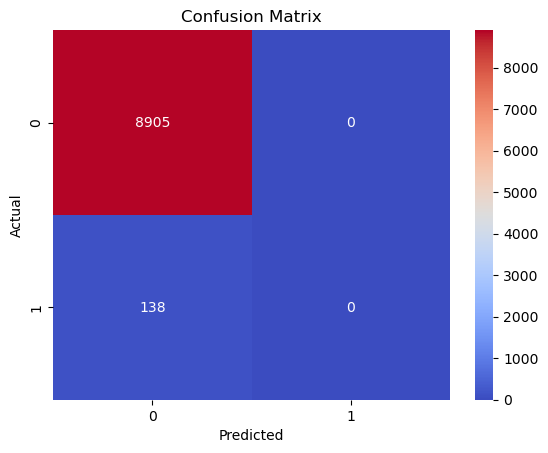

In [38]:
rcm = confusion_matrix(y_test, rfy_pred)
sns.heatmap(rcm, annot=True, cmap="coolwarm", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
classifiers = [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(),'K-Nearest Neighbours'],
              [SGDClassifier(),'SGD Classifier'],
              [SVC(),'SVC'],
              [GaussianNB(),'Naive Bayes'],
              [DecisionTreeClassifier(random_state = 42),'Decision tree'],
              [LogisticRegression(), 'Logistic Regression']
              ]

In [40]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

In [41]:
acc_list = {}
prec_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred_model = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred_model)
    p_score = precision_score(y_test, pred_model)
    r_score = recall_score(y_test, pred_model)
    roc_score = roc_auc_score(y_test, pred_model)
     
    acc_list[model_name] = ([str(round(a_score * 100,2)) + '%'])
    prec_list[model_name] = ([str(round(p_score * 100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score * 100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score * 100,2)) + '%'])
    
    if model_name != classifier[1][-1]:
        print('')

In [42]:
print("Accuracy")
s1=pd.DataFrame(acc_list)
s1.head()

Accuracy


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,98.37%,98.46%,98.46%,98.47%,98.47%,91.21%,96.22%,98.47%


In [43]:
print("Precision")
s2=pd.DataFrame(prec_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,23.53%,0.0%,0.0%,0.0%,0.0%,5.79%,6.03%,0.0%


In [44]:
print("Recall")
s3=pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,2.9%,0.0%,0.0%,0.0%,0.0%,31.16%,10.14%,0.0%


In [45]:
print("Roc_Auc")
s4=pd.DataFrame(roc_list)
s4.head()

Roc_Auc


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,51.38%,49.99%,49.99%,50.0%,50.0%,61.65%,53.85%,50.0%


#### Unsupervised Learning

In [46]:
# machine learning and evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bracket'],
      dtype='object')

In [48]:
df.shape

(45211, 18)

In [49]:
# Check for duplicates

df.duplicated().sum()

0

In [50]:
df.head(3)  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Aged (<56)
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Elderly (<=55)
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult (<=40)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df["Scaled_balance"] = scaler.fit_transform(df["balance"].values.reshape(-1,1))
df["Scaled_duration"] =scaler.fit_transform(df["duration"].values.reshape(-1,1))
df.drop(["balance","duration"], axis=1, inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding
encoder = LabelEncoder()          #method initialization

                           # Looping for columns except survived
for c in df.columns[1:]:
    if (df[c].dtype == 'object'):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c]=df[c]
df.head(3) 

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,age_bracket,Scaled_balance,Scaled_duration
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0,1,0.092259,0.053070
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0,2,0.073067,0.030704
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0,0,0.072822,0.015453


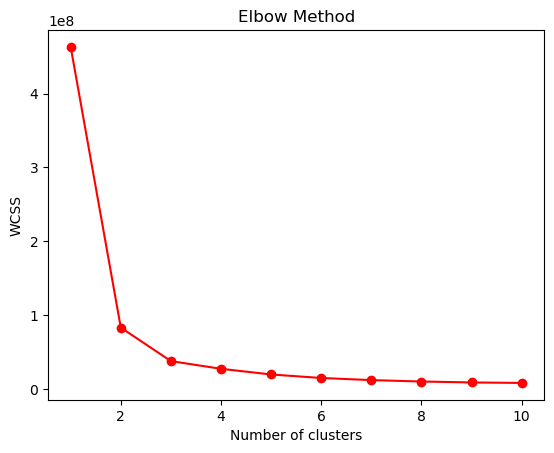

In [53]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, color='r', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this code block, the objective is to determine the optimal number of clusters for the k=means clustering algorithm.the optimal number of clusters is important because it affects the quality of the clustering results. A plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called "Elbow Method" plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. in this case, the plot shows that the optimal number of clusters is 3, as the WCSS starts to decrease at a slower rate beyound that point.